# CountingPeople

## Static statistics 
### Description

The following code generates some statistics used to annalyse our system.

### Requisites

    - Python 3.6
    - Pandas
    - Matplotlib
    - numpy
    - Ipython


In [119]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from datetime import datetime

### Functions

    - read_csv: Next function read the csv and parse it to dataFrame

In [120]:
def read_csv(file):
    csv = pd.read_csv(file)
    csv['time'] = pd.to_datetime(csv['time'], format='%Y/%m/%d-%H:%M:%S')
    csv = csv.set_index(pd.DatetimeIndex(csv['time']))
    return csv

    - mac_occurs: plot the mac occurs along the time

In [121]:
def mac_occurs(df, show):
    g = df.groupby(["mac", "time"], as_index=False)
    d= g.size()
    plt.axes().axes.set_xticklabels([])
    plt.title('Occurs per mac')
    plt.xlabel("MACs")
    plt.ylabel("Occurs")
    plt.tight_layout()
    ax = d.plot(x='mac', y=d, kind='bar')
    ax.set_xticklabels([])
    plt.savefig('mac_occurs.pdf', bbox_inches="tight")
    if show is True:
        plt.show()
        plt.gcf().clear()

    - origin_activity: plot all the activity on the system.

In [122]:
def origin_activity(df, show):
    g = df.groupby(pd.TimeGrouper(freq='45s')).size()
    g.plot(x='time', y=g, kind='bar')
    plt.title('Origin activity on the system')
    plt.xlabel("Time")
    plt.ylabel("Origin")
    plt.tight_layout()
    plt.savefig("origin_activity.pdf", bbox_inches="tight")
    if show is True:
        plt.show()
        plt.gcf().clear()

    - mac_activity: plots the activity each mac along the time 

In [123]:
"""
Deberia estar mal, pero da el mismo resultado que mac_activity
"""
def mac_activity_bad(df, show):
    df = df.drop(['type', 'ID', 'device'], axis=1)
    g = df.groupby([
        pd.TimeGrouper(freq='45s')], as_index=True)

    df = pd.DataFrame(columns=['time', 'macs'])
    for name, group in g:
        df.loc[len(df)] = [name, len(group.groupby(['mac']))]

    df.plot(x='time', y='macs', kind='bar',
            title='Mac activity on the system', legend=False)
    plt.title('Activity on the system')
    plt.xlabel("Time")
    plt.ylabel("Activity")
    plt.tight_layout()
    plt.savefig("mac_activity_bad.pdf", bbox_inches="tight")
    if show is True:
        plt.show()
        plt.gcf().clear()

In [124]:
def mac_activty_good(df, show):
    csv_1 = df.drop(['type', 'ID', 'device'], axis=1)
    csv_1 = csv_1.set_index(pd.DatetimeIndex(csv_1['time']))
    group_by_mac_in_time = csv_1.groupby(['mac'], as_index=False).first()
    group_by_mac_in_time = group_by_mac_in_time.set_index(
        pd.DatetimeIndex(group_by_mac_in_time['time']))
    group_by_mac_in_time = group_by_mac_in_time.groupby(
        [pd.TimeGrouper(freq='45s')], as_index=False).size()

    plt.title('Activity on the system')
    plt.xlabel("Time")
    plt.ylabel("MAC")
    group_by_mac_in_time.plot(kind='bar')
    plt.savefig("mac_activity_good.pdf", bbox_inches="tight")
    plt.tight_layout()
    if show is True:
        plt.show()
        plt.gcf().clear()

    - mac_system: Plot the acumulated number of macs in the system

In [125]:
def mac_system(df, show):
    csv_1 = df.drop(['type', 'ID', 'device'], axis=1)
    csv_1 = csv_1.set_index(pd.DatetimeIndex(csv_1['time']))
    group_by_mac_in_time = csv_1.groupby(['mac'], as_index=False).first()
    group_by_mac_in_time = group_by_mac_in_time.set_index(
        pd.DatetimeIndex(group_by_mac_in_time['time']))
    group_by_mac_in_time = group_by_mac_in_time.groupby(
        [pd.TimeGrouper(freq='45s')], as_index=False).size().cumsum()

    plt.title('Mac on the system')
    plt.xlabel("Time")
    plt.ylabel("Nº Macs")
    group_by_mac_in_time.plot()
    plt.savefig("mac_system.pdf", bbox_inches="tight")
    if show is True:
        plt.show()
        plt.gcf().clear()

### Example

Main program example with results

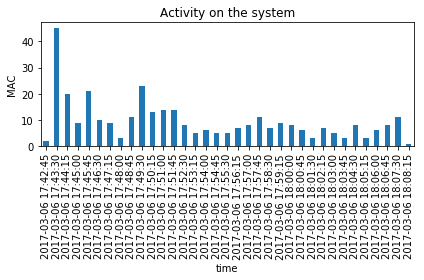

In [126]:
df = read_csv('Captura_Peritos.csv')
mac_activty_good(df, True)

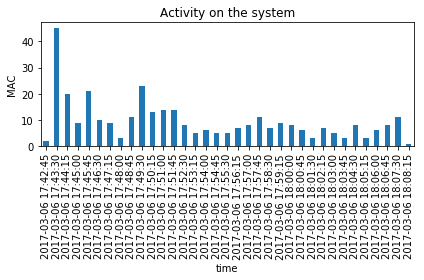

In [127]:
mac_activty_good(df, True)

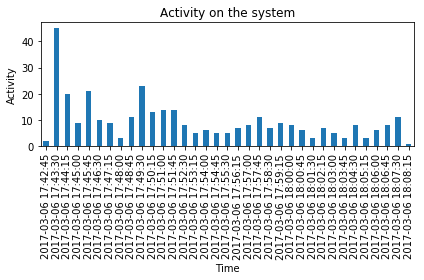

In [128]:
mac_activity_bad(df, True)

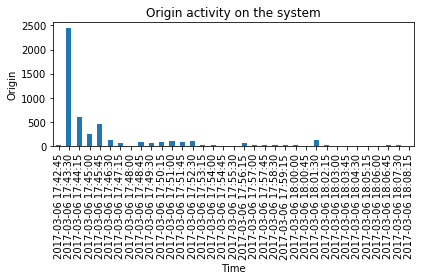

In [129]:
origin_activity(df, True)

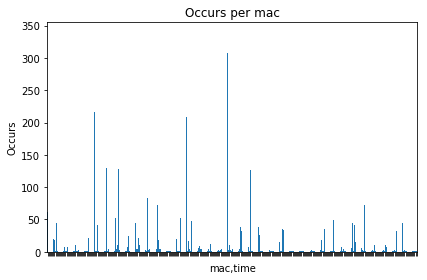

In [130]:
mac_occurs(df, True)